In [17]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

plt.rc('font', family='NanumGothicCoding')
sns.set(font='NanumGothicCoding')

In [18]:
movie = pd.read_csv('영화_관람객통계.csv')
book = pd.read_csv('도서_판매통계.csv')

In [19]:
book

,월,판매부수
0,1,10000683
1,2,8775392
2,3,10831620
3,4,8151327
4,5,8361668
5,6,7725923
6,7,9499881
7,8,8849639
8,9,8340707
9,10,9764419


In [20]:
movie

,영화명,관객수,대표국적,월
0,소방관,2655275,한국,12
1,모아나 2,2135726,미국,12
2,위키드,821627,미국,12
3,히든페이스,351809,한국,12
4,무파사: 라이온 킹,333134,미국,12
...,...,...,...,...
7394,레전더리 콘서트: 레너드 번스타인,0,독일,1
7395,번지점프를 하다,0,한국,1
7396,봄날은 간다,0,한국,1
7397,파이란,0,한국,1


In [21]:
data = pd.DataFrame({'영화 관객수':movie.groupby(by=["월"]).sum()['관객수'], '도서 판매부수':book.groupby(by=["월"]).sum()['판매부수']})

In [22]:
data

,영화 관객수,도서 판매부수
월,,
1,7752095,10000683
2,11458714,8775392
3,11697143,10831620
4,9334865,8151327
5,11356729,8361668
6,11329974,7725923
7,12033801,9499881
8,11779811,8849639
9,10105369,8340707


Text(0.5, 1.0, '월별 관객 수 그래프')

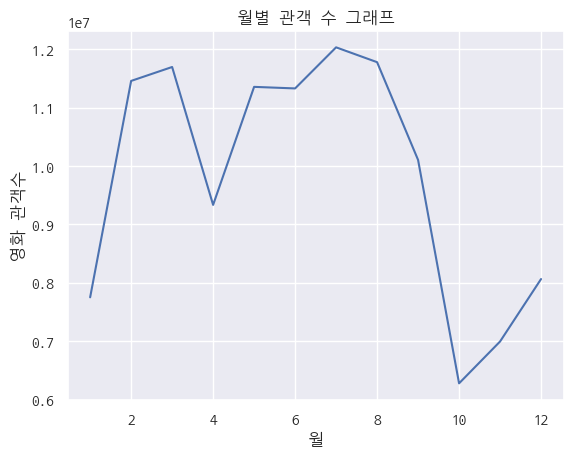

In [23]:
sns.lineplot(data['영화 관객수']).set_title("월별 관객 수 그래프")

Text(0.5, 1.0, '월별 도서 판매부수 그래프')

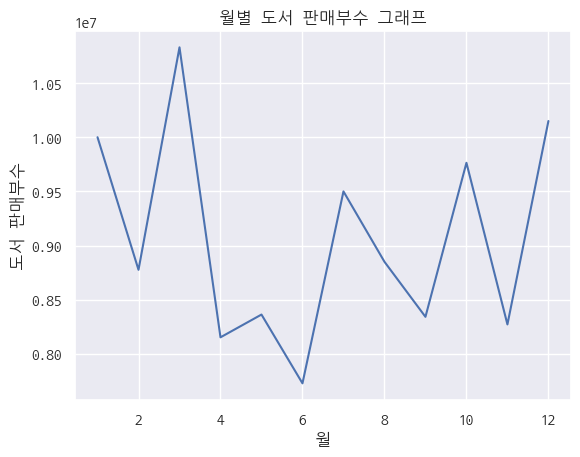

In [24]:
sns.lineplot(data['도서 판매부수']).set_title("월별 도서 판매부수 그래프")

In [25]:
data.corr()

,영화 관객수,도서 판매부수
영화 관객수,1.000000,-0.160556
도서 판매부수,-0.160556,1.000000


In [26]:
movie

,영화명,관객수,대표국적,월
0,소방관,2655275,한국,12
1,모아나 2,2135726,미국,12
2,위키드,821627,미국,12
3,히든페이스,351809,한국,12
4,무파사: 라이온 킹,333134,미국,12
...,...,...,...,...
7394,레전더리 콘서트: 레너드 번스타인,0,독일,1
7395,번지점프를 하다,0,한국,1
7396,봄날은 간다,0,한국,1
7397,파이란,0,한국,1


In [27]:
movie_sum = pd.DataFrame({'관객수':movie.groupby(by=['영화명']).sum()['관객수'].sort_values(ascending=False)})

In [28]:
movie_sum

,관객수
영화명,
파묘,11914680
범죄도시4,11502779
인사이드 아웃 2,8799013
베테랑2,7525333
파일럿,4718045
...,...
"앙골라의 여왕, 은징가",0
어텀 노트,0
장건재 단편선,0


Text(0.5, 1.0, '월별 비교 그래프')

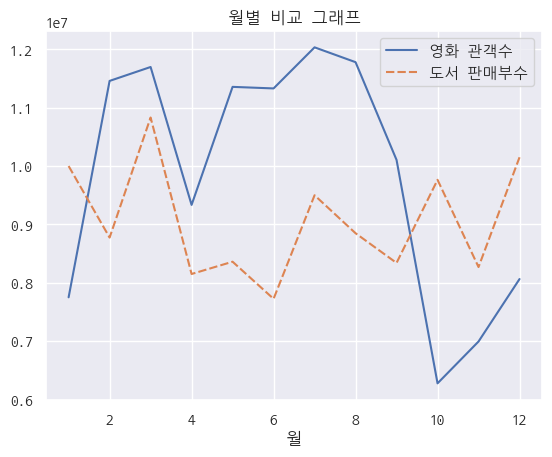

In [29]:
sns.lineplot(data).set_title("월별 비교 그래프")

#### 비교 결과
도서 판매량과 영화 관람객 수가 함께 증가하거나 감소하는 경우가 많이보임(총 12회 중 서로 같이 증가 or 감소 8회, 하나만 증가하고 다른 하나는 감소 4회)<br>
도서는 아마 계절이나 시기(연말)의 영향을 많이 받는 것 같음(특정 계절이 시작되는 시기 별로 판매량 증가-3월, 7월, 10월)<br>
영화는 특정 영화의 개봉에 의한 영향을 많이 받음<br>
도서와 영화는 영화와 OTT처럼 대체재가 아니라 서로 다른 별개의 풀을 가지는 것 같음

#### 주요 요인
<b>주요 영화 개봉일자</b><br>
파묘-2월 22일 개봉, 관람객 수 1190만<br> 
범죄도시4-4월 24일 개봉, 관람객 수 1150만<br>
인사이드 아웃2-6월 12일 개봉, 관람객 수 879만<br>
파일럿-7월 31일 개봉, 관람객 수 471만<br>
베테랑2-9월 13일 개봉, 관람객 수 752만<br>

<b>도서 관련 주요 이슈</b><br>
한강 노벨문학상수상 10월

#### 월별 주요 사항과 예상 요인

<b>3월 도서 판매량 대폭 증가</b><br>
고3 수험생 & N수생들의 수능 대비 도서 구매로 인한 영향이 아닐까 예상

<b>4월 관객과 판매 부수 모두 대폭 하락</b><br>
4월 24일 범죄도시 개봉 이전까지 주요 영화 없음-4월 말 개봉으로 4월 관객 수에 큰 영향 미치지 못한 것 같음<br>
3월에 도서 판매량이 매우 높은 것을 알 수 있는데 이에 따라 4월에는 도서판매량이 하락한 것으로 예상(3월에 구매한 책을 4월까지 독서 중)<br>
본격적인 봄의 시작으로 야외 활동 증가에 따른 영향?

<b>7월 관객과 판매 부수 모두 상승</b><br>
7월에는 메가 히트를 달성한 작품은 없지만 탈주, 데드풀과 울버린, 인사이드 아웃2(6월 초 개봉으로 7월에는 관람객 수 하락세)등의 영화들이 모두 준수한 성적을 보이며 2024년 최고 성적을 달성

<b>10월 도서 판매 부수 상승과 영화 관객 대폭 하락</b><br>
당시 한강 작가의 노벨문학상 수상으로 도서 판매량이 많이 늘어난 것으로 예상<br>
10월 주요 영화 개봉 없음<br>
9월 17일~10월 8일 흑백요리사 공개(최근 몇 년 사이 영화관의 경쟁자로 OTT 등장. 이와 관련하여 9월부터 10월에 공개된 흑백요리사가 엄청난 인기를 끌었던 것도 영향을 미쳤을 것으로 예상)

<b>12월 관객과 판매 부수 모두 상승</b><br>
연말 기간 가족 & 연인 & 친구들 간의 활동량 증가<br>
연말 & 연초 목표로 독서가 자주 등장하는 것이 영향을 미친 것으로 예상<br>
영화 같은 경우는 상승하긴 했지만 그래도 여전히 낮은 상태-10월 이후 주요 영화 개봉이 없는 것이 영향이 큰 것 같음

#### 결론
도서 판매량과 영화 관람객 수는 서로 간에 영향을 주고 받는다기 보다는 다른 요소의 영향을 더 많이 받는 것 같음<br>
도서 판매량과 영화 관람객 사이에 큰 관계는 발견하지 못하였음. 아마 영화와 도서 간의 영향보다는 월별에 따른 주요 활동(여행, 나들이 등)의 차이와 OTT라는 강력한 경쟁자의 영향이 더 큰 것 같음.